# Virtual Dollar Cards Twitter Sentiment Analysis

In [2]:
# Import basic libries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import More libries/modules
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords   
from datetime import datetime
import glob                     
import os
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anelawrence/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Get a list of all json files in a folder
file_list = glob.glob("/home/anelawrence/cardtonic_data/virtual_cards/*.json")

# Read each file and store in a list
dfs = [pd.read_json(file) for file in file_list]

# Concatenate all DataFrames into one
combine_df = pd.concat(dfs, ignore_index=True)

In [27]:
tweets_df_2 = combine_df[['id','url','text','createdAt','retweetCount','replyCount','likeCount','quoteCount','viewCount','inReplyToUsername','author','lang','searchTermIndex']]

In [ ]:
# Define the pattern matching your CSV files 
pattern = "/home/anelawrence/cardtonic_data/virtual_cards/dataset_twitter-x-data*.json"

# Get a list of all files matching the pattern
files = glob.glob(pattern)

# Loop through the list and remove each file
for file in files:
    os.remove(file)
    print(f"Removed {file}")

In [21]:
raw_df = pd.read_csv('/home/anelawrence/cardtonic_data/virtual_cards/raw_tweet_data.csv')

/tmp/ipykernel_379422/501886217.py:1: DtypeWarning: Columns (1,2,5,6,23,26,29,32,35,38,41,44,50,51,54,55,56,59,79,84,89,94,104,105,106,108,125,128,130,131,133,134,135,148,151,154,157,160,163,166,169,172,175,178,181,184,187,190,193,196,199,205,206,209,228,229,233,234,238,239,243,244,248,249,253,254,258,259,263,264,268,269,273,274,278,279,283,284,288,289,293,294,298,299,303,304,308,309,313,314,318,319,323,324,328,329,333,334,338,339,343,344,348,349,353,354,358,359,363,364,368,369,373,374,378,379,383,384,388,389,393,394,398,399,403,404,408,409,413,414,418,419,423,424,428,429,433,434,438,439,440,441,445,446,448,449,451,452,454,455,457,458,460,461,463,464,466,467,469,470,472,473,475,476,478,479,481,482,484,485,487,488,490,491,493,494,496,497,499,500,502,503,505,506,508,509,511,512,514,515,517,518,520,521,523,524,526,527,529,530,532,533,535,536,538,539,541,542,544,545,547,548,550,551,553,554,556,557,559,560,562,563,631,632,634,635,637,638,639,643,644,646,647,649,650,652,653,655,656,658,659,6

In [24]:
raw_df[['id','url','full_text','created_at','retweet_count','reply_count','quote_count','in_reply_to_user_id_str','lang','searchTerms']].isnull().sum()

id                             0
url                         1788
full_text                   1788
created_at                  1788
retweet_count               1788
reply_count                 1788
quote_count                 1788
in_reply_to_user_id_str    17232
lang                        1788
searchTerms                 2058
dtype: int64

In [9]:
raw_df_2 = pd.read_csv('/home/anelawrence/cardtonic_data/virtual_cards/02_raw_tweet_data.csv')

In [13]:
raw_df_2[['id','url','text','createdAt','retweetCount','replyCount','likeCount','quoteCount','viewCount','inReplyToUsername','author','lang','searchTermIndex']].shape

(64231, 13)

In [25]:
#combine_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/02_raw_tweet_data.csv', index=False)

## Data Cleaning

In [25]:
raw_df = raw_df[['id','url','full_text','created_at','retweet_count','reply_count','quote_count','in_reply_to_user_id_str','lang','searchTerms']]

In [27]:
raw_df.shape

(46355, 10)

In [28]:
raw_df[['url','full_text']].duplicated().sum()

32510

In [29]:
# Drop duplicate tweets
raw_df.drop_duplicates(subset=['url','full_text'], inplace=True)
raw_df[['url','full_text']].duplicated().sum()

0

In [30]:
#raw_df = raw_df.dropna()
raw_df = raw_df.dropna(subset=['full_text'])

In [31]:
raw_df.shape

(13844, 10)

In [32]:
tweets_df_2 = pd.read_csv('/home/anelawrence/cardtonic_data/virtual_cards/02_raw_tweet_data.csv')

In [33]:
tweets_df_2.createdAt.tail()

64226    Sat Sep 21 08:04:58 +0000 2024
64227    Fri Sep 20 22:04:08 +0000 2024
64228    Wed Sep 18 19:54:14 +0000 2024
64229    Tue Sep 17 17:36:54 +0000 2024
64230    Tue Sep 17 08:26:24 +0000 2024
Name: createdAt, dtype: object

In [34]:
tweets_df_2 = tweets_df_2[['id','url','text','createdAt','retweetCount','replyCount','quoteCount','inReplyToUsername','lang','searchTermIndex']]

In [39]:
tweets_df_2[['url','text']].shape

(20278, 2)

In [36]:
# Drop duplicate tweets
tweets_df_2.drop_duplicates(subset=['url','text'], inplace=True)
tweets_df_2[['url','text']].duplicated().sum()

0

In [38]:
#raw_df = raw_df.dropna()
tweets_df_2 = tweets_df_2.dropna(subset=['text'])

In [40]:
tweets_df_2.columns

Index(['id', 'url', 'text', 'createdAt', 'retweetCount', 'replyCount',
       'quoteCount', 'inReplyToUsername', 'lang', 'searchTermIndex'],
      dtype='object')

In [41]:
rename_map = {
    'text': 'full_text',
    'createdAt': 'created_at',
    'retweetCount': 'retweet_count',
    'replyCount': 'reply_count',
    'quoteCount': 'quote_count',
    'inReplyToUsername': 'in_reply_to_user_id_str',
    'searchTermIndex': 'searchTerms'
}

tweets_df_2 = tweets_df_2.rename(columns=rename_map)

In [42]:
tweets_df_2.dtypes

id                          int64
url                        object
full_text                  object
created_at                 object
retweet_count               int64
reply_count                 int64
quote_count                 int64
in_reply_to_user_id_str    object
lang                       object
searchTerms                 int64
dtype: object

In [43]:
raw_df.dtypes

id                          object
url                         object
full_text                   object
created_at                  object
retweet_count              float64
reply_count                float64
quote_count                float64
in_reply_to_user_id_str    float64
lang                        object
searchTerms                 object
dtype: object

In [44]:
# Combine both DataFrame
tweets_ = pd.concat([raw_df, tweets_df_2], ignore_index=True)

In [45]:
tweets_.shape

(34122, 10)

In [46]:
tweets_.dtypes

id                          object
url                         object
full_text                   object
created_at                  object
retweet_count              float64
reply_count                float64
quote_count                float64
in_reply_to_user_id_str     object
lang                        object
searchTerms                 object
dtype: object

In [47]:
# Drop duplicate tweets
tweets_.drop_duplicates(subset=['url','full_text'], inplace=True)
tweets_[['url','full_text']].duplicated().sum()

0

In [48]:
tweets_.shape

(32496, 10)

In [57]:
tweets_['date'].isnull().any()

False

In [51]:
rename_map = {
    'full_text': 'tweet',
    'created_at': 'date',
}

tweets_ = tweets_.rename(columns=rename_map)

In [52]:
tweets_.columns

Index(['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
       'quote_count', 'in_reply_to_user_id_str', 'lang', 'searchTerms'],
      dtype='object')

In [53]:
tweets_["lang"].unique()

array(['en', 'in', 'tl', 'et', 'ht', 'fr', 'es', 'nl', 'pt', 'de', 'zh',
       'it', 'tr', 'sv', 'ca', 'fi', 'ar', 'und', 'qht', 'qme', 'eu',
       'lt', 'sl', 'ja', 'art', 'pl', 'da', 'qam', 'zxx', 'th', 'ko',
       'cs', 'cy', 'hi', 'no', 'qst', 'ro', 'is', 'el', 'ru', 'uk', 'sr',
       'hu', 'fa'], dtype=object)

In [54]:
#droping tweet rows which languange isn't english laguage
tweets_ = tweets_[tweets_["lang"].isin(['en'])]

In [58]:
tweets_.shape

(26384, 10)

In [59]:
#tweets_.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/combine_tweet_data.csv', index=False)

In [63]:
tweets_ = pd.read_csv('/home/anelawrence/cardtonic_data/virtual_cards/combine_tweet_data.csv')

In [67]:
tweets_.shape

(26384, 10)

In [68]:
#df['UserName'] = df['url'].str.slice(0, 3)
tweets_['User'] = tweets_['url'].apply(lambda x: x.split('/')[3])

In [75]:
df = pd.read_csv('/home/anelawrence/cardtonic_data/virtual_cards/Scrapped_Tweets.csv')

In [77]:
df.shape

(470, 11)

In [78]:
# df = df[~df['text'].str.contains('cardtonic', case=False, na=False)].reset_index(drop=True)

In [79]:
#df['UserName'] = df['url'].str.slice(0, 3)
df['User'] = df['url'].apply(lambda x: x.split('/')[3])

In [81]:
df.columns

Index(['id', 'url', 'twitterUrl', 'text', 'retweetCount', 'replyCount',
       'quoteCount', 'createdAt', 'bookmarkCount', 'isRetweet', 'isQuote',
       'User'],
      dtype='object')

In [82]:
tweets_.shape

(26384, 11)

In [83]:
# Drop columns that are not part of the new schema
df = df.drop(['twitterUrl', 'bookmarkCount', 'isRetweet', 'isQuote'], axis=1)

# Rename the columns according to the new schema
rename_map = {
    'text': 'tweet',
    'createdAt': 'date',
    'retweetCount': 'retweet_count',
    'replyCount': 'reply_count',
    'quoteCount': 'quote_count'
}
df = df.rename(columns=rename_map)

# Add new columns that are in the new schema but not in the original DataFrame.
# Here we initialize them with NaN (or any other default value you prefer)
df['in_reply_to_user_id_str'] = None
df['lang'] = 'en'
df['searchTerms'] = None

# Check the updated DataFrame columns
df.columns

Index(['id', 'url', 'tweet', 'retweet_count', 'reply_count', 'quote_count',
       'date', 'User', 'in_reply_to_user_id_str', 'lang', 'searchTerms'],
      dtype='object')

In [84]:
df = df[['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
       'quote_count', 'in_reply_to_user_id_str', 'lang', 'searchTerms',
       'User']]

In [87]:
# Combine both DataFrame
tweets_df = pd.concat([df, tweets_], ignore_index=True)

In [91]:
tweets_df.shape

(26573, 11)

In [89]:
tweets_df['date'].isnull().any()

False

In [90]:
# Drop duplicate tweets
tweets_df.drop_duplicates(subset=['url','tweet'], inplace=True)
tweets_df[['url','tweet']].duplicated().sum()

0

In [92]:
# tweets_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/combine_tweet_data.csv', index=False)

In [93]:
# Define a function to check for each virtual card brand
def get_virtual_card(tweet):
    # Ensure tweet is a string and convert to lower case for case-insensitive matching
    tweet_lower = tweet.lower() if isinstance(tweet, str) else ''

    
    if any(keyword.lower() in tweet_lower for keyword in ["Barter", "Flutterwave", "Barter card", "Barter virtual card"]):
        return "Flutterwave"
    elif any(keyword.lower() in tweet_lower for keyword in ["ALAT", "Wema Bank"]):
        return "ALAT by Wema"
    elif any(keyword.lower() in tweet_lower for keyword in ["Chipper", "Chipper Card", "Chipper Cash", "Chipper virtual card"]):
        return "Chipper Cash"
    elif any(keyword.lower() in tweet_lower for keyword in ["Bitsika", "Bitsika card", "#Bitsika"]):
        return "Bitsika"
    elif any(keyword.lower() in tweet_lower for keyword in ["kuda", "Kuda Bank", "Kuda virtual card", "#KudaBank"]):
        return "Kuda Bank"
    elif any(keyword.lower() in tweet_lower for keyword in ["Fundall", "Fundall virtual card", "Fundall card"]):
        return "Fundall"
    elif any(keyword.lower() in tweet_lower for keyword in ["#Payday", "Payday virtual card", "Payday card", "ourpaydayHQ"]):
        return "Payday"
    elif any(keyword.lower() in tweet_lower for keyword in ["Eversend", "Eversend virtual card", "Eversend card"]):
        return "Eversend"
    elif any(keyword.lower() in tweet_lower for keyword in ["Changera", "Changera virtual card"]):
        return "Changera"
    elif any(keyword.lower() in tweet_lower for keyword in ["Grey card"]):
        return "Grey"
    elif any(keyword.lower() in tweet_lower for keyword in ["Cardtonic", "Cardtonic virtual card", "#Cardtonic"]):
        return "Cardtonic"
    else:
        return np.nan  


In [94]:
# Apply function to DataFrame and to create 'virtual_card' column with tweet text
tweets_df['virtual_card'] = tweets_df['tweet'].apply(get_virtual_card)

In [95]:
tweets_df[['tweet', 'virtual_card']].shape

(26573, 2)

In [98]:
# Set the maximum column width to None (i.e., no truncation)
pd.set_option('display.max_colwidth', None)
tweets_df[tweets_df['virtual_card'].isnull()][['tweet', 'User' ,'date', 'virtual_card']].shape

(8264, 4)

In [62]:
# ['FlwSupport', 'FlutterwaveEng', 'chippercashapp', 'BitsikaAfrica', 'PAYDAY3Techie', 'merlineversend', 'eversendapp', 'tomwilladof']

In [102]:
# tweets_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/combine_tweet_data.csv', index=False)

In [103]:
tweets_df.shape

(26573, 12)

In [104]:
# Adding Cardtonic data
df_1 = pd.read_csv('/home/anelawrence/cardtonic_data/cardtonic_tweets.csv')
df_2 = pd.read_csv('/home/anelawrence/cardtonic_data/cardtonic_tweets_2.csv')

In [105]:
# Combine both DataFrame
df = pd.concat([df_1, df_2], ignore_index=True)

In [106]:
df.columns

Index(['id', 'url', 'fullText', 'createdAt', 'retweetCount', 'replyCount',
       'likeCount', 'quoteCount', 'viewCount', 'inReplyToUsername',
       'author/followers', 'author/following', 'author/userName'],
      dtype='object')

In [107]:
# Drop duplicate tweets
df.drop_duplicates(subset=['fullText'], inplace=True)
df['fullText'].duplicated().sum()

0

In [108]:
# 1. Rename columns to match the new names
rename_map = {
    'fullText': 'tweet',
    'createdAt': 'date',
    'retweetCount': 'retweet_count',
    'replyCount': 'reply_count',
    'quoteCount': 'quote_count',
    'inReplyToUsername': 'in_reply_to_user_id_str',
    'author/userName': 'User'
}

df = df.rename(columns=rename_map)

# 2. Drop the columns that are not needed in the new schema
df = df.drop(columns=['likeCount', 'viewCount', 'author/followers', 'author/following'])

# 3. Add new columns that are in the target schema but not in the original DataFrame.
# You can set these to a default value (e.g., None, empty string, etc.) as needed.
df['lang'] = 'en'
df['searchTerms'] = 'Cardtonic'
df['virtual_card'] = 'Cardtonic'

# 4. Reorder the columns to match the new schema:
#    ['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
#     'quote_count', 'in_reply_to_user_id_str', 'lang', 'searchTerms', 'User', 'virtual_card']
df = df[['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
         'quote_count', 'in_reply_to_user_id_str', 'lang', 'searchTerms', 'User', 'virtual_card']]

In [109]:
tweets_df.columns

Index(['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
       'quote_count', 'in_reply_to_user_id_str', 'lang', 'searchTerms', 'User',
       'virtual_card'],
      dtype='object')

In [110]:
df.columns

Index(['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
       'quote_count', 'in_reply_to_user_id_str', 'lang', 'searchTerms', 'User',
       'virtual_card'],
      dtype='object')

In [111]:
## Filter out acrdtonic data from 2022-08 only
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define your start date (e.g., '2023-03-01')
start_date = pd.to_datetime('2022-08-01')

# Get the current date (using today's date)
current_date = pd.Timestamp.now()

# Filter the DataFrame for rows with 'date' between start_date and current_date
df = df[(df['date'] >= start_date) & (df['date'] <= current_date)]

In [112]:
tweets_df.shape

(26573, 12)

In [75]:
#tweets_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/clean_tweet_data.csv', index=False)

In [113]:
# Combine both DataFrame
tweets_df = pd.concat([df, tweets_df], ignore_index=True)

In [115]:
# Drop duplicate tweets
tweets_df.drop_duplicates(subset=['tweet'], inplace=True)
tweets_df['tweet'].duplicated().sum()

0

In [118]:
tweets_['tweet'].isnull().any()

False

In [119]:
#tweets_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/combine_tweet_data.csv', index=False)

In [120]:
# Set the maximum column width to None (i.e., no truncation)
pd.set_option('display.max_colwidth', None)
tweets_df[tweets_df['virtual_card'].isnull()][['tweet', 'User' ,'date', 'virtual_card']].shape

(7643, 4)

In [121]:
tweets_df = tweets_df.dropna(subset=['virtual_card'])

In [ ]:
# ['FlwSupport', 'FlutterwaveEng', 'chippercashapp', 'BitsikaAfrica', 'PAYDAY3Techie', 'merlineversend', 'eversendapp',
# 'tomwilladof', 'alat_ng', 'adwianprio', 'pangsitgowreng', 'joshun', 'selkcouth', 'oraspele', 'PunkPink1283539', 
#  'Dinasti_313', 'reinaldyjpr', '26TRIXZZ', 'wemabank', 'alat_tech', 'grok', 'jamesnotjemss', 'greyfinance', 
#  'get_fundall', ]

In [122]:
# Dropping tweets from official account and some other non-relevant tweets
# List of users to exclude
exclude_users = [
    'FlwSupport', 'FlutterwaveEng', 'chippercashapp', 'BitsikaAfrica', 'PAYDAY3Techie', 
    'merlineversend', 'eversendapp', 'tomwilladof', 'alat_ng', 'adwianprio', 
    'pangsitgowreng', 'joshun', 'selkcouth', 'oraspele', 'PunkPink1283539', 
    'Dinasti_313', 'reinaldyjpr', '26TRIXZZ', 'wemabank', 'alat_tech', 
    'grok', 'jamesnotjemss', 'greyfinance', 'get_fundall', 'cardtonic'
]

# Filter the DataFrame to drop rows where the 'User' column is in the exclude_users list
tweets_df = tweets_df[~tweets_df['User'].isin(exclude_users)]

In [133]:
tweets_df.columns

Index(['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
       'quote_count', 'in_reply_to_user_id_str', 'lang', 'searchTerms', 'User',
       'virtual_card'],
      dtype='object')

In [130]:
print(tweets_df['tweet'].isnull().any())
print(tweets_df['date'].isnull().any())

False
False


In [134]:
tweets_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/clean_tweet_data.csv', index=False)

## Data Preprocessing

In [135]:
tweets_df = pd.read_csv('/home/anelawrence/cardtonic_data/virtual_cards/clean_tweet_data.csv')

In [136]:
tweets_df.columns

Index(['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
       'quote_count', 'in_reply_to_user_id_str', 'lang', 'searchTerms', 'User',
       'virtual_card'],
      dtype='object')

In [147]:

tweets_df['date'].isnull().any()

False

In [138]:
# function to clean tweet column
def clean_text(text):  
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    pat7 = r'\n'
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6, pat7))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [140]:
tweets_df["clean_tweet"] = tweets_df["tweet"].apply(clean_text)

In [141]:
tweets_df["clean_tweet"].head()

0    real sociedad  manchester united
1                    atm  real madrid
2     athletic madrid  vs real madrid
3                    atm  real madrid
4                       atm  r madrid
Name: clean_tweet, dtype: object

In [142]:
# Removing Some football Prediction tweets
# List of keywords to filter out
keywords = ['Real Madrid', 'ATM', 'Manchester United', 'Manchester city', 'Man city', 'Arsenal', 'Tottenham']

# Create a regex pattern that matches any of the keywords (case insensitive)
pattern = '|'.join(keywords)  #'Real Madrid | ATM | Manchester United'

tweets_df = tweets_df[~tweets_df['clean_tweet'].str.contains(pattern, case=False, na=False)].reset_index(drop=True)

In [143]:
tweets_df.columns

Index(['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
       'quote_count', 'in_reply_to_user_id_str', 'lang', 'searchTerms', 'User',
       'virtual_card', 'clean_tweet'],
      dtype='object')

In [144]:
# selecting the important columns for this analysis
tweets_df = tweets_df[['date', 'clean_tweet', 'url', 'retweet_count', 'User', 'virtual_card']]

In [150]:
tweets_df.shape

(21577, 6)

### Apply Sentiment Analysis Model

In [151]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load tokenizer and model for a three-class sentiment analysis
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define labels corresponding to the model's output indices
labels = ["negative", "neutral", "positive"]

# Sentiment Analysis function
def predict_sentiment(tweet):
    # Encode the text with truncation
    inputs = tokenizer(tweet, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    # Convert logits to probabilities
    scores = outputs.logits.detach().numpy()[0]
    scores = np.exp(scores) / np.sum(np.exp(scores))
    max_index = scores.argmax()
    return pd.Series([labels[max_index], scores[max_index]])

In [152]:
# Apply the prediction function to the DataFrame
tweets_df[['sentiment', 'confidence']] = tweets_df['clean_tweet'].apply(predict_sentiment)

In [153]:
tweets_df[['sentiment', 'confidence','clean_tweet', 'date']].tail(10)

,sentiment,confidence,clean_tweet,date
21567,negative,0.939353,never will i ever send money to chipper cash that bank na nonsensemtchewwwwwww,Wed Mar 12 04:43:02 +0000 2025
21568,negative,0.938930,i need to rid myself of chipper cash and everything remotely tied to them for no reason none at all they have refused to reimburse my account after a transfer made since yesterdayand honestly im done,Wed Mar 12 02:22:59 +0000 2025
21569,neutral,0.600263,today ngn usd rate on these apps th march vitalswap usd ngn chipper cash usd ngn save extra n if you use vitalswap today follow for daily updates sign up to save more on dollar,Tue Mar 11 13:34:51 +0000 2025
21570,negative,0.886454,why do friends abroad always ignore you when you say i need a favour from you a friend just did this to me i only wanted them to get me apple gift cardwanted to use them for subscriptioninstagram vendors scammed me chipper cash wants to finish me please how can i buy gift cards,Tue Mar 11 09:07:42 +0000 2025
21571,neutral,0.704150,download the bitsika app so you can earn usdt daily buy crypto virtual visa debit cards with usdt trade usdt via pp and chat with me jon on the app no kyc or id needed register with my link,Sat Sep 21 03:32:40 +0000 2024
21572,positive,0.731893,the opay virtual card is much more effective than that kuda own,Sat Dec 21 20:04:08 +0000 2024
21573,neutral,0.818177,nah but fr fundalls transfer speed gtgtgtgt,Fri Dec 15 18:32:05 +0000 2023
21574,positive,0.687283,the payday loans market is evolvingrising demand for shortterm credit solutions is driving market growthdigital lending platforms are transforming accessibility amp conveniencestay ahead with the latest insights,Wed Mar 12 11:56:36 +0000 2025
21575,negative,0.805169,the biggest thieves out there i withdrew everything i had from and removed the app use grey or a virtual card from your bank,Sun Mar 09 13:22:26 +0000 2025
21576,negative,0.688196,putin has the ultimate card to play that still kinda a grey area if they get desperate they will nuke the ukrainians occupying russian landthere nothing to do except escalate or find peace terms russia isnt going to hand over land it lost hundreds of thousands to take,Sun Mar 09 02:08:52 +0000 2025


In [154]:
# Count positive, negative & neural values
print(tweets_df['sentiment'].value_counts())
tweets_df['sentiment'].value_counts('proportion')

sentiment
neutral     11393
negative     5540
positive     4644
Name: count, dtype: int64


sentiment
neutral     0.528016
negative    0.256755
positive    0.215229
Name: proportion, dtype: float64

In [155]:
#creating a polarity column to show if the tweet is positive, negative or neutral (1,-1,0)
def analysis(score):
    if score == "negative":
        return -1
    elif score == "neutral":
        return 0
    else:
        return 1

tweets_df['polarity'] = tweets_df['sentiment'].apply(analysis)

In [165]:
tweets_df[['date', 'sentiment', 'confidence', 'polarity','clean_tweet', 'virtual_card']].tail()

,date,sentiment,confidence,polarity,clean_tweet,virtual_card
21572,Sat Dec 21 20:04:08 +0000 2024,positive,0.731893,1,the opay virtual card is much more effective than that kuda own,Kuda Bank
21573,Fri Dec 15 18:32:05 +0000 2023,neutral,0.818177,0,nah but fr fundalls transfer speed gtgtgtgt,Fundall
21574,Wed Mar 12 11:56:36 +0000 2025,positive,0.687283,1,the payday loans market is evolvingrising demand for shortterm credit solutions is driving market growthdigital lending platforms are transforming accessibility amp conveniencestay ahead with the latest insights,Payday
21575,Sun Mar 09 13:22:26 +0000 2025,negative,0.805169,-1,the biggest thieves out there i withdrew everything i had from and removed the app use grey or a virtual card from your bank,Chipper Cash
21576,Sun Mar 09 02:08:52 +0000 2025,negative,0.688196,-1,putin has the ultimate card to play that still kinda a grey area if they get desperate they will nuke the ukrainians occupying russian landthere nothing to do except escalate or find peace terms russia isnt going to hand over land it lost hundreds of thousands to take,ALAT by Wema


In [162]:
print(tweets_df['clean_tweet'].isnull().any())
print(tweets_df['date'].isnull().any())

False
False


In [166]:
tweets_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/vc_analyzed_tweets.csv', index=False)

## Data Visualization and Exploratory

In [4]:
tweets_df = pd.read_csv('/home/anelawrence/cardtonic_data/virtual_cards/vc_analyzed_tweets.csv')

In [5]:
print(tweets_df['clean_tweet'].isnull().any())
print(tweets_df['date'].isnull().any())

True
False


In [6]:
tweets_df[tweets_df['clean_tweet'].isnull() == True].shape

(10, 9)

In [8]:
tweets_df = tweets_df.dropna(subset=['clean_tweet'])
tweets_df['clean_tweet'].isnull().any()

False

In [39]:
total_tweets = tweets_df.shape[0]
print("Total tweet: ", total_tweets)

user_count = tweets_df['User'].nunique()
print('Number of Users:', user_count)

Total tweet:  21567
Number of Users: 13513


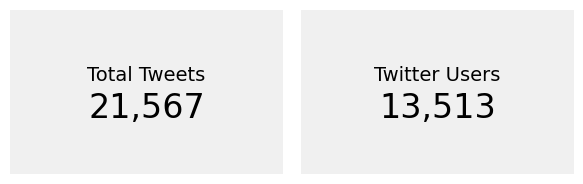

In [41]:
# Apply a Seaborn theme for consistent styling
sns.set_theme(style="white")

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 2))  # adjust figsize as needed

for ax in axes:
    ax.axis('off')  # hide the axes for a clean card look
    # Add a background rectangle to simulate the card
    card_bg = plt.Rectangle((0, 0), 1, 1, transform=ax.transAxes, color="#f0f0f0")
    ax.add_patch(card_bg)

# First card
axes[0].text(0.5, 0.6, "Total Tweets", fontsize=14, ha="center", va="center", color="black")
axes[0].text(0.5, 0.4, f"{total_tweets:,}", fontsize=24, ha="center", va="center", color="black")

# Second card
axes[1].text(0.5, 0.6, "Twitter Users", fontsize=14, ha="center", va="center", color="black")
axes[1].text(0.5, 0.4, f"{user_count:,}", fontsize=24, ha="center", va="center", color="black")

# Save the figure as an image file (download it)
#plt.savefig("tweet_card_visual.png", dpi=300)

plt.tight_layout()
plt.show()

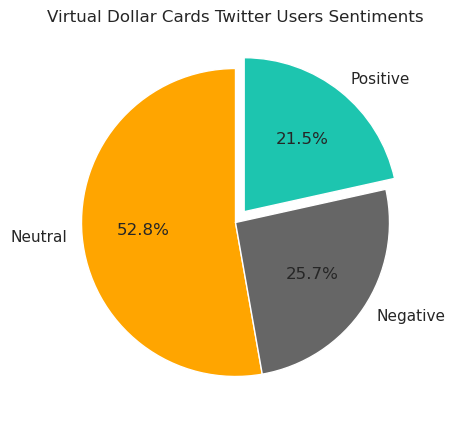

In [16]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[7,5], facecolor='none')
plt.pie(tweets_df['sentiment'].value_counts(), labels=['Neutral', "Negative",'Positive'], colors=['orange', '#666666', '#1dc5af'], startangle=90, explode= [0,0,0.09], autopct='%1.1f%%');
plt.title('Virtual Dollar Cards Twitter Users Sentiments');

In [183]:
#tweets_df[tweets_df['virtual_card'] == 'Cardtonic']['sentiment'].value_counts()
tweets_df['sentiment'].value_counts()

sentiment
neutral     11383
negative     5540
positive     4644
Name: count, dtype: int64

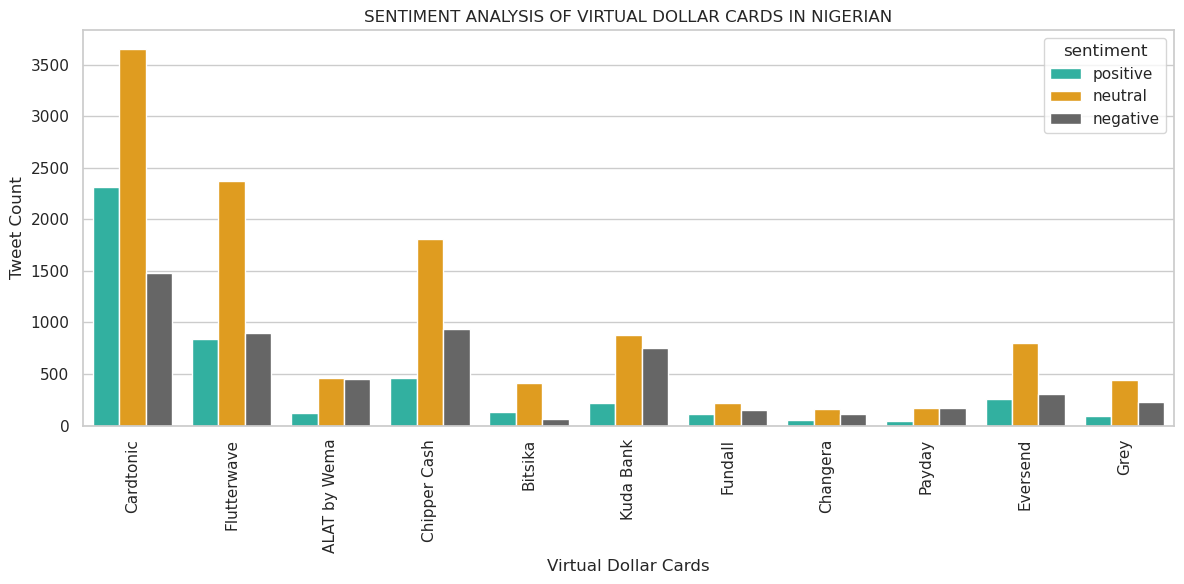

In [15]:
# Set up the seaborn style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# Define your custom palette mapping
palette = {'positive': '#1dc5af', 'negative': '#666666', 'neutral': 'orange'}

sns.countplot(data=tweets_df, x='virtual_card', hue='sentiment', palette=palette)
plt.title('Sentiment Analysis of Virtual Dollar Cards in Nigerian'.upper())

plt.xlabel('Virtual Dollar Cards')
plt.ylabel('Tweet Count')

plt.xticks(rotation=90)  # Rotate x labels for readability
plt.tight_layout()   

plt.show()

In [18]:
# Convert to datetime
tweets_df['date'] = pd.to_datetime(tweets_df['date'], format='%Y-%m-%d %H:%M', errors='coerce')

In [19]:
tweets_df.dtypes

date             datetime64[ns]
clean_tweet              object
url                      object
retweet_count           float64
User                     object
virtual_card             object
sentiment                object
confidence              float64
polarity                  int64
dtype: object

/tmp/ipykernel_389767/3874157859.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="date", y="count", data=monthly_counts, palette="viridis")


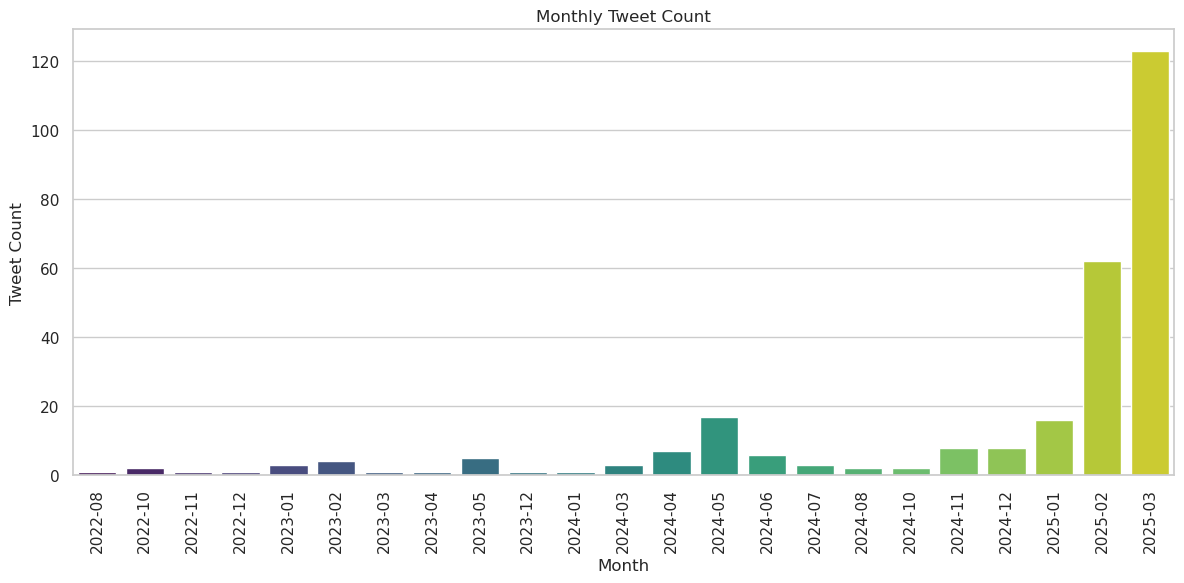

In [34]:
# Group by month using the dt.to_period accessor and count tweets
monthly_counts = tweets_df.groupby(tweets_df['date'].dt.to_period('M')).size().reset_index(name='count')

#monthly_counts = tweets_df.groupby(['virtual_card'])['month_year'].size().reset_index()


# Set up the seaborn style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# Create the barplot
sns.barplot(x="date", y="count", data=monthly_counts, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Tweet Count")
plt.title("Monthly Tweet Count")

plt.tight_layout()

plt.show()

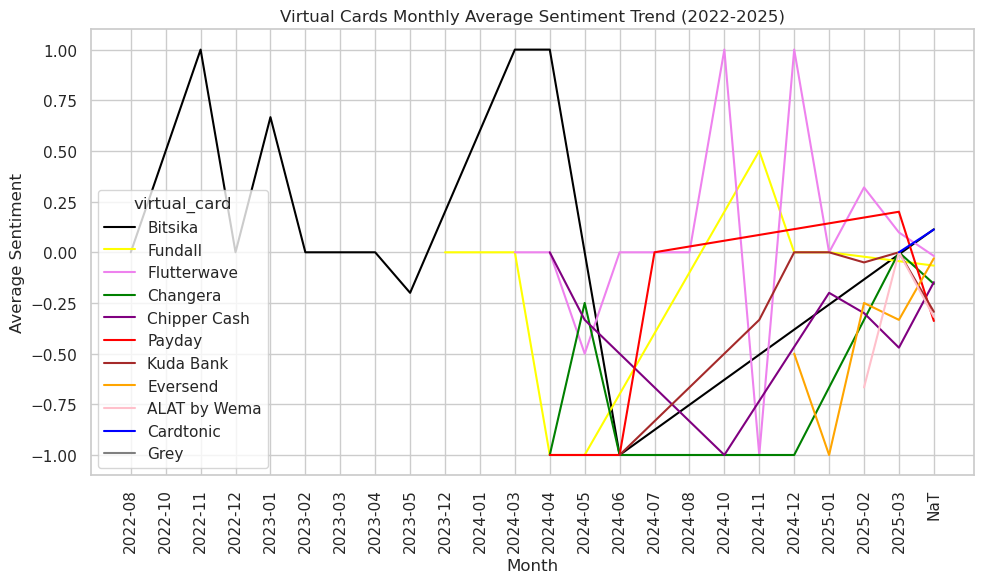

In [20]:
#  create month_year column
tweets_df['month_year'] = tweets_df['date'].dt.to_period('M').astype(str)

# Group by both month_year and virtual_card, then compute the average sentiment (polarity)
monthly_sentiment = tweets_df.groupby(['month_year', 'virtual_card'])['polarity'].mean().reset_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define your custom palette (replace keys with your actual virtual_card values)
custom_palette = {
    'Cardtonic': 'blue',
    'Changera': 'green',
    'Eversend': 'orange',
    'Payday': 'red',
    'Fundall': 'yellow',
    'Kuda Bank': 'brown',
    'Bitsika': 'black',
    'Chipper Cash': 'purple',
    'ALAT by Wema': 'pink',
    'Flutterwave': 'violet',
    'Grey': 'grey'
}

# Plot the monthly trend with hue for virtual_card
sns.lineplot(data=monthly_sentiment, x='month_year', y='polarity', hue='virtual_card', ax=ax, palette=custom_palette)
plt.title('Virtual Cards Monthly Average Sentiment Trend (2022-2025)')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')

plt.xticks(rotation=90)  # Rotate x labels for readability
plt.tight_layout()       # Adjust layout if necessary
plt.show()

In [202]:
tweets.columns

Index(['month_year', 'polarity', 'virtual_card'], dtype='object')

### Creating word cloud

In [22]:
stop_words = stopwords.words('english')
stop_words = stop_words + ['u', 'na', 'know', 'one', 'go', 'make', 'see', 'dont', 'amp', 'im', 'cant']
tweets_df['cleaned_words'] = tweets_df['clean_tweet'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

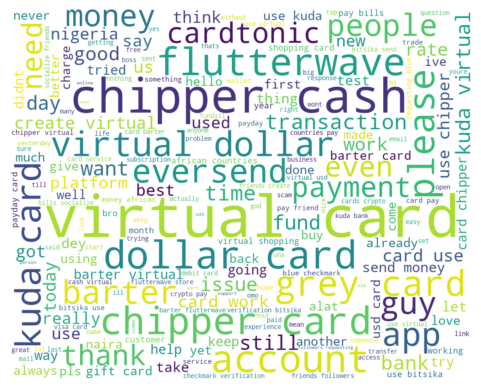

In [23]:
#Creating the text variable
text = " ".join(i for i in tweets_df.cleaned_words)

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

### Negative Tweets

In [24]:
negative_df = tweets_df[tweets_df['sentiment'] == 'negative']

In [25]:
negative_df.shape

(5540, 11)

In [26]:
# Set the max column width to None to display the full text
pd.set_option('display.max_colwidth', None)

negative_df[['sentiment','confidence','clean_tweet', 'virtual_card']].tail()

,sentiment,confidence,clean_tweet,virtual_card
21567,negative,0.939353,never will i ever send money to chipper cash that bank na nonsensemtchewwwwwww,Chipper Cash
21568,negative,0.938930,i need to rid myself of chipper cash and everything remotely tied to them for no reason none at all they have refused to reimburse my account after a transfer made since yesterdayand honestly im done,Chipper Cash
21570,negative,0.886454,why do friends abroad always ignore you when you say i need a favour from you a friend just did this to me i only wanted them to get me apple gift cardwanted to use them for subscriptioninstagram vendors scammed me chipper cash wants to finish me please how can i buy gift cards,Chipper Cash
21575,negative,0.805169,the biggest thieves out there i withdrew everything i had from and removed the app use grey or a virtual card from your bank,Chipper Cash
21576,negative,0.688196,putin has the ultimate card to play that still kinda a grey area if they get desperate they will nuke the ukrainians occupying russian landthere nothing to do except escalate or find peace terms russia isnt going to hand over land it lost hundreds of thousands to take,ALAT by Wema


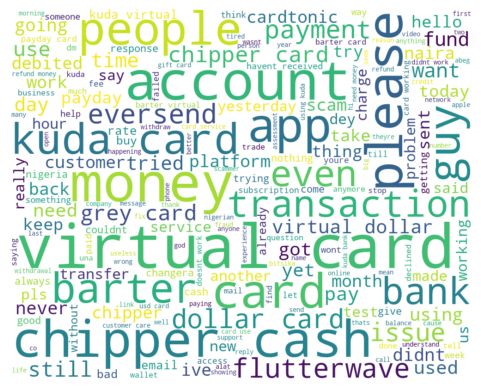

In [27]:
#Creating the text variable
text = " ".join(i for i in negative_df.cleaned_words.astype(str))

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")

plt.imshow(wc, interpolation = "bilinear")

### Positive Tweets

In [28]:
positive_df = tweets_df[tweets_df['sentiment'] == 'positive']

In [29]:
positive_df.shape

(4644, 11)

In [31]:
positive_df[['sentiment','confidence','clean_tweet', 'virtual_card']].head()

,sentiment,confidence,clean_tweet,virtual_card
0,positive,0.793051,let your face shine upon me,Cardtonic
5,positive,0.952267,god bless you abundantly sir,Cardtonic
7,positive,0.970248,cardtonic is great,Cardtonic
8,positive,0.872880,stay blessed,Cardtonic
9,positive,0.817794,wowamazing,Cardtonic


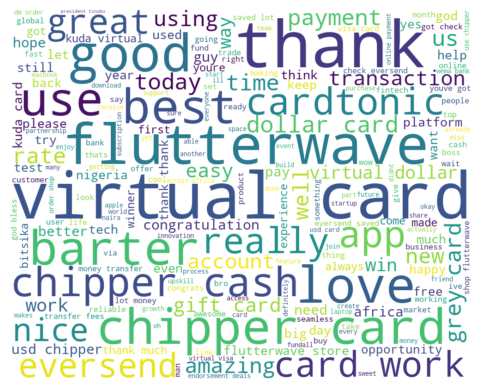

In [32]:
#Creating the text variable
text = " ".join(i for i in positive_df.cleaned_words)

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

In [232]:
positive_df[positive_df['virtual_card'] == "Flutterwave"]

,date,clean_tweet,url,retweet_count,User,virtual_card,sentiment,confidence,polarity,month_year,cleaned_words
7455,2025-03-06 16:25:00,timi aboyeji is my onetime favorite because he is a cofounder of flutterwave and an advocate for blockchain adoption additionally aboyeji is an active angel investor in web startups providing both financial support and mentorship,https://x.com/JamieCares/status/1897684953820721400,0.0,JamieCares,Flutterwave,positive,0.972437,1,2025-03,timi aboyeji onetime favorite cofounder flutterwave advocate blockchain adoption additionally aboyeji active angel investor web startups providing financial support mentorship
7458,2025-03-06 14:22:00,funny yet interesting observation in this case youd need to rely on general consensus what do people typically think about this designer work personally when i started out i prioritized following designers working at top tech companies like airbnb flutterwave spotify and apple,https://x.com/darasoba/status/1897654137707499759,0.0,darasoba,Flutterwave,positive,0.747094,1,2025-03,funny yet interesting observation case youd need rely general consensus people typically think designer work personally started prioritized following designers working top tech companies like airbnb flutterwave spotify apple
7461,2025-03-06 11:56:00,the makings of a big year how flutterwave conquered,https://x.com/frankulom/status/1897617258135888050,0.0,frankulom,Flutterwave,positive,0.663157,1,2025-03,makings big year flutterwave conquered
7462,2025-03-06 11:55:00,the makings of a big year how flutterwave conquered,https://x.com/converseernews/status/1897616910423887884,0.0,converseernews,Flutterwave,positive,0.663157,1,2025-03,makings big year flutterwave conquered
7463,2025-03-06 11:54:00,a ripple partnerflutterwave a fintech solution provider has received a payment system licence from the bank of zambiaacquiring this licence allows the company to operate in zambia thus expanding its payment solutions across africa,https://x.com/Michael63140627/status/1897616899942343067,9.0,Michael63140627,Flutterwave,positive,0.595201,1,2025-03,ripple partnerflutterwave fintech solution provider received payment system licence bank zambiaacquiring licence allows company operate zambia thus expanding payment solutions across africa
...,...,...,...,...,...,...,...,...,...,...,...
21517,NaT,im excited to share my discovery about smartplace is revolutionizing asset trading tokenize and trade real estate vehicles and digital goods as nfts on the velas blockchainsecure your deal with digital legal contracts amp global delivery brtr,https://x.com/JoyBren26828672/status/1899797167977451607,0.0,JoyBren26828672,Flutterwave,positive,0.961249,1,NaT,excited share discovery smartplace revolutionizing asset trading tokenize trade real estate vehicles digital goods nfts velas blockchainsecure deal digital legal contracts global delivery brtr
21519,NaT,im really impressed with and what theyre buildingbarter smartplace is changing asset trading by allowing real estate vehicles and digital goods to be traded as nfts on the velas blockchain,https://x.com/CharleyPin93/status/1899796531550523665,0.0,CharleyPin93,Flutterwave,positive,0.970090,1,NaT,really impressed theyre buildingbarter smartplace changing asset trading allowing real estate vehicles digital goods traded nfts velas blockchain
21521,NaT,barter is always good and fun,https://x.com/Gum3Bearfinn/status/1899790967927869622,0.0,Gum3Bearfinn,Flutterwave,positive,0.970296,1,NaT,barter always good fun
21523,NaT,awesome i love the barter system its a winwin,https://x.com/Di58dri/status/1899787500228423825,0.0,Di58dri,Flutterwave,positive,0.989215,1,NaT,awesome love barter system winwin
